                                      # Loan Prediction Project

In [1]:
# Importing Libraries
import pandas as pd             
import numpy as np              # For mathematical calculations
import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For Ploting of Graphs

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

import os

# Reading data

In [2]:
datapath = 'C:\\Users\\Kunal\\Desktop\\Stevens\\Courses\\Applied Machine Learning\\Loan Prediction Project\\Data'
train = pd.read_csv(os.path.join(datapath,'train_u6lujuX_CVtuZ9i.csv'))
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv(os.path.join(datapath,'test_Y3wMUE5_7gLdaTN.csv'))

In [4]:
# make a copy of train and test data so that even if we have to make any changes in these datasets we don't lose data
train_original=train.copy()
test_original=test.copy()

# Understanding Data

In [5]:
# Structure training Dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Structure test Dataset
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Except loan status in test that we have to predict both train and test set have same features

In [7]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# shape of the dataset.
train.shape , test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset

# Exploratory Data Analysis

Univariate Analysis

In [9]:
# Let's Analyse Target Variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

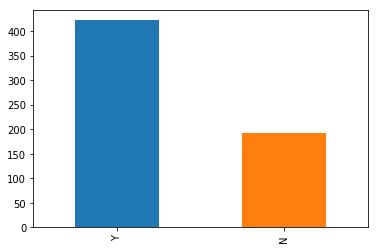

In [10]:
# Bar Plot
train['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.

# Lets Examine each Independent variable in Data Set

Independent Variable (Categorical : Gender, Married, Self_Employed, Credit_History, Loan_Status)

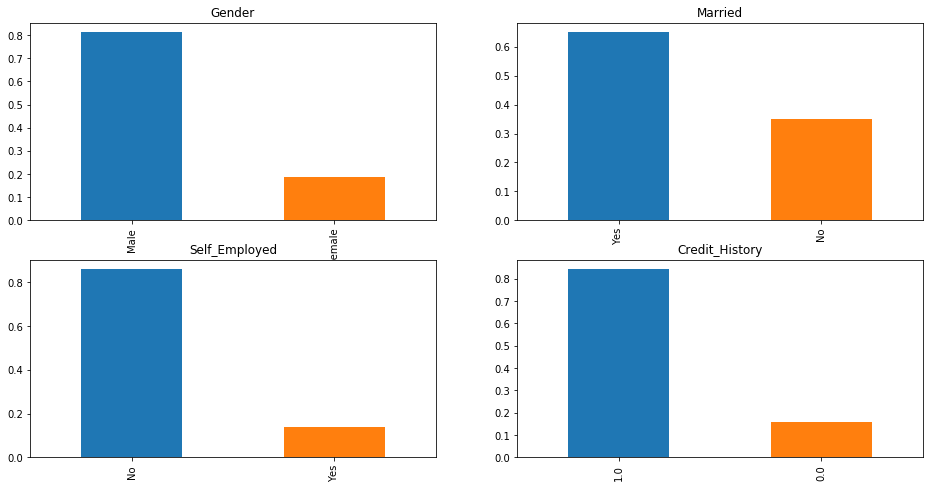

In [11]:
plt.figure()
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(16,8), title= 'Gender')

plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

In [12]:
# Let's Analyse Target Variable
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

we can be inferred from the above bar plots that:

Around 80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have good credit history.

Independent categorical features having some order involved (Dependents, Education, Property_Area)

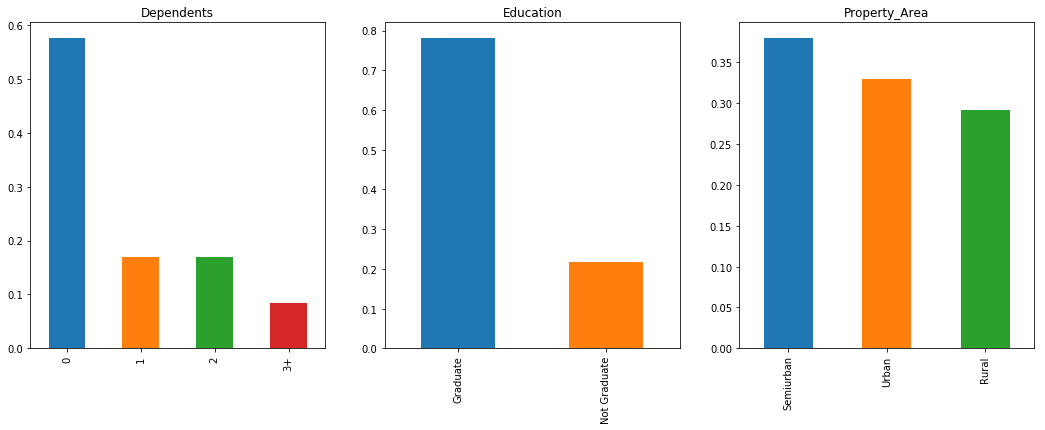

In [13]:
plt.figure(1)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(18,6), title= 'Dependents')

plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

we can be infered from the above bar plots:

Around 58% applicants don’t have any dependents , Around 17% have one , Another 17% have two and rest of them have 3 or more .
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

# Lets Examine Numerical Variable using probability density plots 

Independent Variable (Numerical : ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

In [14]:
# Check Any null Values
train['ApplicantIncome'].isnull().any()

False

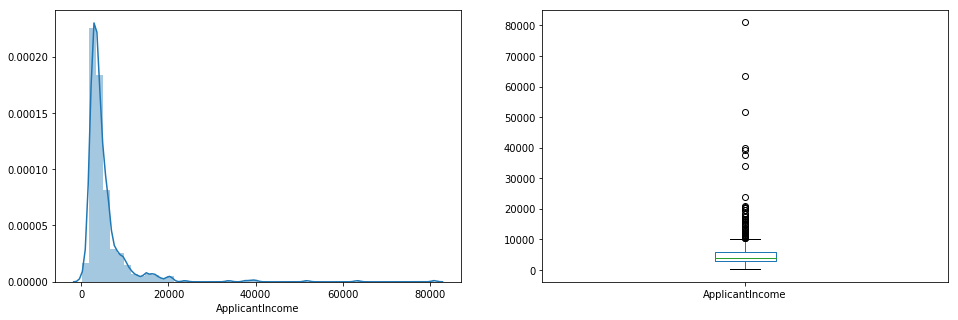

In [15]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The boxplot confirms the presence of a lot of outliers/extreme values

Text(0.5,0.98,'')

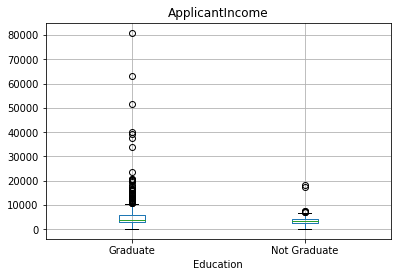

In [16]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Lets visualize coapplicant income

In [17]:
# Check Any Null Values
train['CoapplicantIncome'].isnull().any()

False

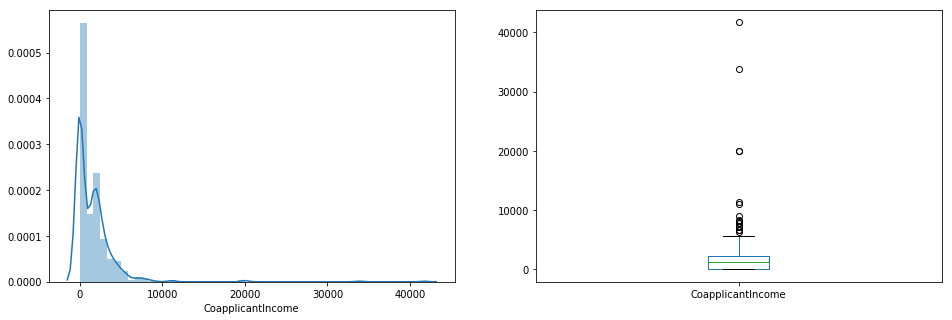

In [18]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Lets visualize loan amount variable

In [19]:
train['LoanAmount'].isnull().any()

True

In [20]:
# drop null values from data for visuliation purpose
mod_train = train.dropna()
mod_train.shape



(480, 13)

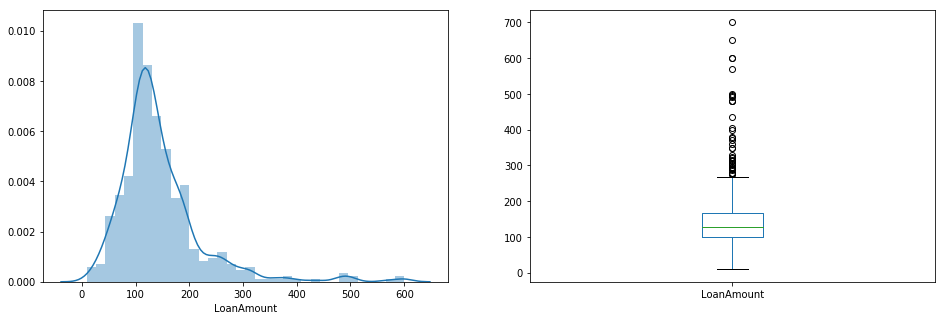

In [21]:
plt.figure(1)

plt.subplot(1,2,1)
sns.distplot(mod_train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal

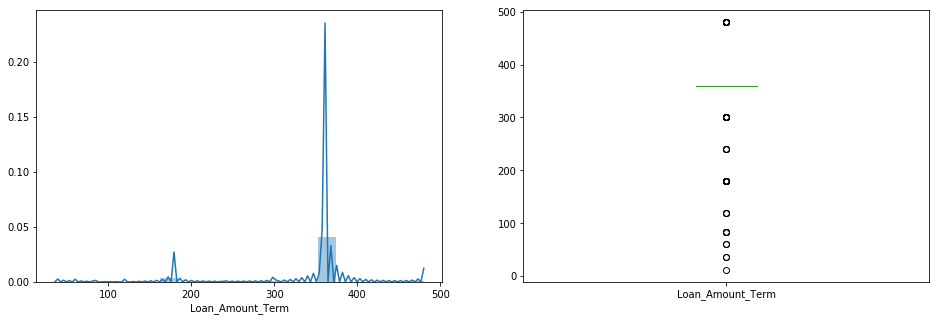

In [22]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(mod_train['Loan_Amount_Term'])

plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

# Now we will see how well each feature correlate with Loan Status

In [23]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Lets visulize

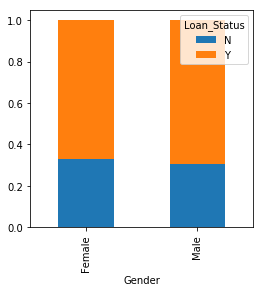

In [24]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

 proportion of male and female applicants is more or less same for both approved and unapproved loans

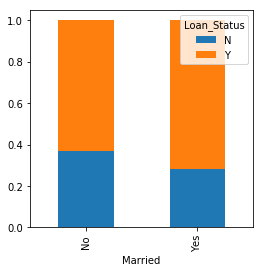

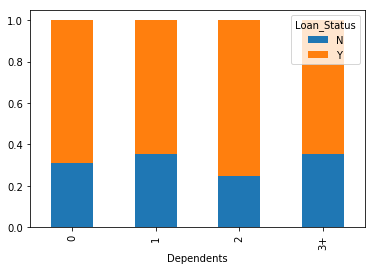

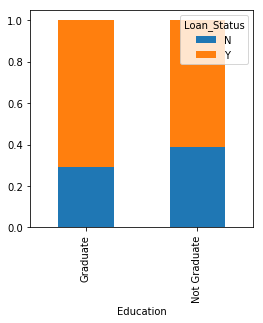

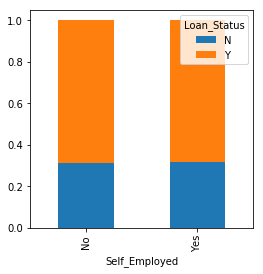

In [25]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])


Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot

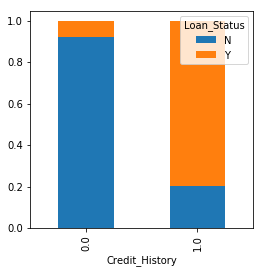

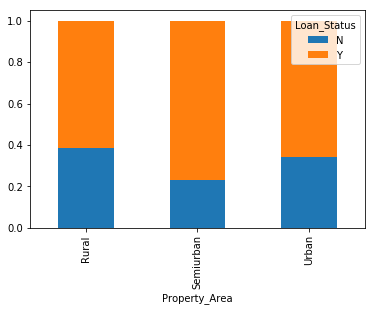

In [26]:
# Explore other variables
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

It can be infered people with credit history as 1 are more likely to get their loans approved.


Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Now let’s visualize numerical independent variables with respect to target variable.

In [27]:
# Applicant Income

train['ApplicantIncome'].min() , train['ApplicantIncome'].max() , train['ApplicantIncome'].mean(), train['ApplicantIncome'].median()

(150, 81000, 5403.459283387622, 3812.5)

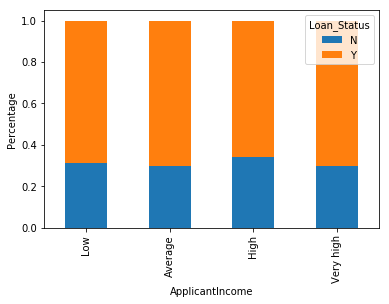

In [28]:
bins=[0,2500,4500,6500,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(mod_train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

we can be inferred that Applicant income does not affect the chances of loan approval

In [29]:
# Let's analyze coapplicant income
train['CoapplicantIncome'].min() , train['CoapplicantIncome'].max() , train['CoapplicantIncome'].mean()

(0.0, 41667.0, 1621.245798027101)

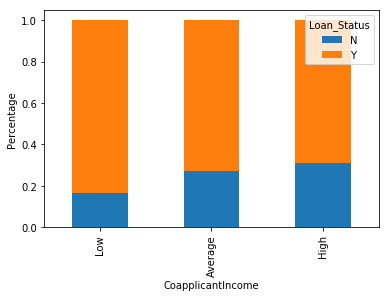

In [30]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(mod_train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval

In [31]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

train['Total_Income'].min() , train['Total_Income'].max() , train['Total_Income'].mean()

(1442.0, 81000.0, 7024.705081414722)

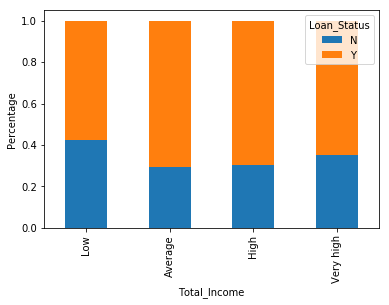

In [32]:
bins=[0,3000,7500,11000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income

Lets Visulize Loan Amount

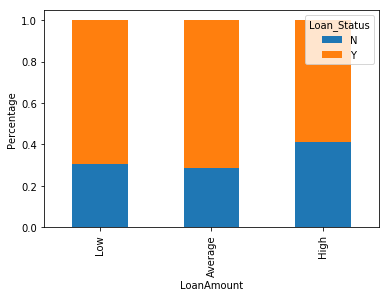

In [33]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(mod_train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount 

In [34]:
Loan_Amount_Term =pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])
Loan_Amount_Term

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,153,359


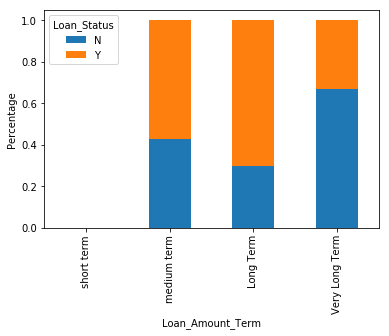

In [35]:
bins=[0,24,90,360,480]
group=['short term','medium term','Long Term','Very Long Term']
train['Loan_Amount_Term_bin']=pd.cut(mod_train['Loan_Amount_Term'],bins,labels=group)

Loan_Amount_Term_bin=pd.crosstab(train['Loan_Amount_Term_bin'],train['Loan_Status'])
Loan_Amount_Term_bin.div(Loan_Amount_Term_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan_Amount_Term')
P = plt.ylabel('Percentage')

In [36]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin,Loan_Amount_Term_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,Average,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Average,Average,Long Term
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Low,Low,Long Term
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,Average,Average,Long Term
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,Average,Average,Long Term


Let’s drop the bins which we created for the exploration part

In [37]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income','Loan_Amount_Term_bin'], axis=1)

# Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. 

In [9]:
# We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.

train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

#Replace value in Dependants Column
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

In [10]:
cor_coef = train.corr()
cor_coef

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


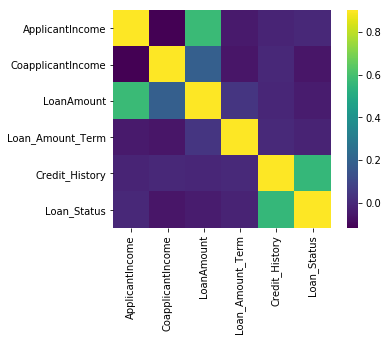

In [98]:
#f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(cor_coef, vmax=.9, square=True, cmap='viridis');

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [99]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

we have to treat missing values differently for categorical and numerical features

Lets first handle missing values in categorical featires

In [100]:

# Lets Replace missing value in categorical feature with most frequent value 

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [101]:
# Lets Replace missing value in Numerical feature (Loan Amount Term )with mean value 
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)

# Lets Replace missing value in Numerical feature in (Loan Amount) with median value
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [102]:
# Lets check agian 
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Doing same missing value Treatment for Test Data set

In [103]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Lets Treat the outliers

In [46]:
'''
# Applicant Income
train['ApplicantIncome'][train['ApplicantIncome'] > 10000]=10000
train['ApplicantIncome'][train['ApplicantIncome'] < 500]=500
test['ApplicantIncome'][test['ApplicantIncome'] > 10000]=10000
test['ApplicantIncome'][test ['ApplicantIncome'] < 500]=500
'''

"\n# Applicant Income\ntrain['ApplicantIncome'][train['ApplicantIncome'] > 10000]=10000\ntrain['ApplicantIncome'][train['ApplicantIncome'] < 500]=500\ntest['ApplicantIncome'][test['ApplicantIncome'] > 10000]=10000\ntest['ApplicantIncome'][test ['ApplicantIncome'] < 500]=500\n"

In [47]:
'''# CoApplicant Income
train['CoapplicantIncome'][train['CoapplicantIncome'] > 4500]=4500
test['CoapplicantIncome'][test['CoapplicantIncome'] > 4500]=4500
'''

"# CoApplicant Income\ntrain['CoapplicantIncome'][train['CoapplicantIncome'] > 4500]=4500\ntest['CoapplicantIncome'][test['CoapplicantIncome'] > 4500]=4500\n"

In [48]:
'''# Loan Amount
train['LoanAmount'][train['LoanAmount'] > 250]=250
test['LoanAmount'][test['LoanAmount'] > 250]=250
'''

"# Loan Amount\ntrain['LoanAmount'][train['LoanAmount'] > 250]=250\ntest['LoanAmount'][test['LoanAmount'] > 250]=250\n"

# Feature Engineering


In [104]:
#Total Income -combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
train['Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Income']=test['ApplicantIncome']+test['CoapplicantIncome']

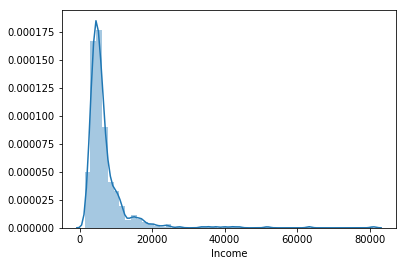

In [105]:
sns.distplot(train['Income']);

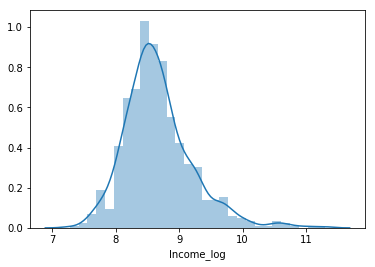

In [106]:
# Applied Log Transformation to make it normalize
train['Income_log'] = np.log(train['Income'])
sns.distplot(train['Income_log']);
test['Income_log'] = np.log(test['Income'])

In [107]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [108]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Income'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Income'], axis=1)

In [109]:
# Drop Unnecessary Feature(Loan_ID ,Gender , Self_Employed)
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
train=train.drop(['Gender','Self_Employed'],axis=1)
test=test.drop(['Gender','Self_Employed'],axis=1)

In [110]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [111]:
# Gender = pd.get_dummies(X['Gender'], drop_first=True)
Married = pd.get_dummies(X['Married'], drop_first=True)
Dependents = pd.get_dummies(X['Dependents'], drop_first=True)
Education = pd.get_dummies(X['Education'], drop_first=True)
#Self_Employed= pd.get_dummies(X['Self_Employed'], drop_first=True)
Property_Area = pd.get_dummies(X['Property_Area'], drop_first=True)

'''
and we removing the first columns in dumies to solve common
problem in statistics known as multicollinearity.
'''
# Add the dummies to dataframe
#X = pd.concat([X,Gender,Married,Dependents,Education,Self_Employed,Property_Area], axis=1)
X = pd.concat([X,Married,Dependents,Education,Property_Area], axis=1)

In [112]:
#Gender = pd.get_dummies(test['Gender'], drop_first=True)
Married = pd.get_dummies(test['Married'], drop_first=True)
Dependents = pd.get_dummies(test['Dependents'], drop_first=True)
Education = pd.get_dummies(test['Education'], drop_first=True)
#Self_Employed= pd.get_dummies(test['Self_Employed'], drop_first=True)
Property_Area = pd.get_dummies(test['Property_Area'], drop_first=True)

'''
and we removing the first columns in dumies to solve common
problem in statistics known as multicollinearity.
'''
# Add the dummies to dataframe
#test = pd.concat([test,Gender,Married,Dependents,Education,Self_Employed,Property_Area], axis=1)

test = pd.concat([test,Married,Dependents,Education,Property_Area], axis=1)

In [113]:

# X.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'], axis=1, inplace=True)

X.drop(['Married','Dependents','Education','Property_Area'], axis=1, inplace=True)

#test.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'], axis=1, inplace=True)
        
test.drop(['Married','Dependents','Education','Property_Area'], axis=1, inplace=True)

In [114]:
# Train and Test Split
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.20)

In [115]:
x_train.head()

,Credit_History,Income_log,EMI,Yes,0,1,2,Not Graduate,Semiurban,Urban
6,1.0,8.255569,0.263889,1,1,0,0,1,0,1
77,1.0,8.299535,0.305556,1,0,1,0,0,0,1
95,1.0,8.822027,0.355556,0,1,0,0,0,0,1
453,0.0,8.506941,0.500000,1,1,0,0,0,0,0
208,1.0,7.815611,0.163889,0,1,0,0,0,0,1


In [116]:
test.head()

,Credit_History,Income_log,EMI,Yes,0,1,2,Not Graduate,Semiurban,Urban
0,1.0,8.651724,0.305556,1,1,0,0,0,0,1
1,1.0,8.428581,0.350000,1,0,1,0,0,0,1
2,1.0,8.824678,0.577778,1,0,0,1,0,0,1
3,1.0,8.494129,0.277778,1,0,0,1,0,0,1
4,1.0,8.094378,0.216667,0,1,0,0,1,0,1


In [117]:
#Feature Scaling to make the feature standardize
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_cv = sc_X.transform(x_cv)
test = sc_X.transform(test)

# Create Machine Learning Models

# Let's Build Decision Tree Classifier

In [118]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [118]:
predict_val = classifier.predict(x_cv)

In [119]:
accuracy_score(y_cv,predict_val)

0.7398373983739838

Let’s predict the Loan_Status for Test set and calculate its accuracy.

In [120]:
predict_DT = classifier.predict(test)

Accuracy in testset after submission to competition portal 65.27%

# Lets Find out hyperparameters using Grid Search

In [121]:
from sklearn.model_selection import GridSearchCV ,StratifiedKFold
parameters = {'criterion': ["gini", "entropy"],
        'max_depth': [2, 3, 4, 5, 6, 7],
        'min_samples_split': [2, 5,10, 20],
        'min_samples_leaf': [1, 5, 10,15],
                  'max_leaf_nodes': [None,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(estimator= classifier, param_grid = parameters,
                           cv = 10)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [122]:
best_accuracy

0.8065173116089613

In [104]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# Let's Run the model using hyperparameters

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,max_leaf_nodes=5,min_samples_leaf=1, random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [120]:
predict_val = classifier.predict(x_cv)

In [121]:
accuracy_score(y_cv,predict_val)

0.7967479674796748

Let’s predict the Loan_Status for Test set and calculate its accuracy

In [108]:
pred_DT_hype = classifier.predict(test)

In [123]:
# Create Submission File for Competition

submission=pd.read_csv(os.path.join(datapath,"Sample_Submission_ZAuTl8O_FK3zQHh.csv"))
submission['Loan_Status']=predict_DT_hype
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Kunal_DT.csv')

Accuracy in testset after submission to competition portal 76.38%

# Let's Build Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [65]:
predict_val = classifier_LR.predict(x_cv)

In [66]:
accuracy_score(y_cv,predict_val)

0.8455284552845529

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_cv,predict_val)

array([[20, 17],
       [ 2, 84]], dtype=int64)

In [32]:
predict_LR = classifier_LR.predict(test)

In [75]:
# Create Submission File
submission=pd.read_csv(os.path.join(datapath,"Sample_Submission_ZAuTl8O_FK3zQHh.csv"))
submission['Loan_Status']=predict_LR
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Kunal_logistic.csv')

Accuracy in testset after submission to competition portal 79.16%

# Let's build Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
classifier_RF = RandomForestClassifier(random_state = 0)
classifier_RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [81]:
predict_val = classifier_RF.predict(x_cv)

In [93]:
# Validation set accuracy
accuracy_score(y_cv,predict_val)

0.7560975609756098

In [96]:
pred_RF = classifier_RF.predict(test)

Accuracy in testset after submission to competition portal 70.13%

In [82]:
# Finding Best Parameters
parameters = {'criterion': ["gini", "entropy"],'max_depth': [2, 3, 4, 5, 6, 7,15],'n_estimators':[10,20,40,50,75,100,125,150]}

In [83]:
from sklearn.model_selection import GridSearchCV ,StratifiedKFold
grid_search = GridSearchCV(estimator= classifier_RF, param_grid = parameters,cv = 7)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [84]:
best_accuracy

0.8105906313645621

In [85]:
best_parameters

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}

In [91]:
# Train the model using hyperparameters
classifier_RFF = RandomForestClassifier(criterion='gini',max_depth= 4,n_estimators = 40,random_state=0)
classifier_RFF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [92]:
predict_val = classifier_RFF.predict(x_cv)
# Validation set accuracy
accuracy_score(y_cv,predict_val)

0.8211382113821138

In [ ]:
predict_RF_hype = classifier_RFF.predict(test)

In [98]:
submission=pd.read_csv(os.path.join(datapath,"Sample_Submission_ZAuTl8O_FK3zQHh.csv"))
submission['Loan_Status']=predict_RF_hype         # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Kunal_Random_Forest.csv')

Accuracy in testset after submission to competition portal 77.77%

# Lets Build Artificial Neural Network

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
'''
I used Adam optimizer and sigmoid activation with two hidden layers each with 20 neurons
'''
classifier_ANN = MLPClassifier(hidden_layer_sizes=(20,20) \
                       ,activation='logistic'\
                       ,solver='adam',max_iter=1000,random_state=0)

In [63]:
classifier_ANN.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
predict_val = classifier_ANN.predict(x_cv)

In [65]:
# Validation Set prediction accracy
accuracy_score(y_cv,predict_val)

0.8536585365853658

In [66]:
# Test Set prediction
predict_ANN = classifier_ANN.predict(test)

In [67]:
# Create submission file for competition
submission=pd.read_csv(os.path.join(datapath,"Sample_Submission_ZAuTl8O_FK3zQHh.csv"))
submission['Loan_Status']=predict_ANN
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Kunal_ANN.csv')

Accuracy in testset after submission to competition portal 78.47%

After trying four different models(Decision Tree, Logistic Regression,Random Forest, Artificial Neural Network) best Accuracy is with Logistic Regression